#### CATBOOST

In [1]:
# importing all the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
import pickle as pkl

Load data

In [2]:
df = pd.read_csv("../Datasets/data.csv")
df.head()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placed,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
0,38,47,13,53,35,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,60,70,60,50,40,33,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,58,73,33,67,30,60,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,36,33,40,33,45,33,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,60,60,55,65,40,73,11,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.columns

Index(['Aptitude', 'English', 'Quantitative', 'Analytical', 'Domain',
       'Computer Fundamental', 'Coding', 'Placed',
       'Branch_Agricultural Engineering',
       'Branch_Applied Electronics and Instrumentation',
       'Branch_Automobile Engineering', 'Branch_Civil Engineering',
       'Branch_Computer Science Engineering', 'Branch_Electrical Engineering',
       'Branch_Electrical and Electronics Engineering',
       'Branch_Electronics and Communications Engineering',
       'Branch_Electronics and Instrumentation Engineering',
       'Branch_Information Technology',
       'Branch_Instrumentation and Control Engineering', 'Branch_MCA',
       'Branch_Mechanical Engineering', 'Degree_B. Tech.', 'Degree_BE',
       'Degree_M. Tech.', 'Degree_MCA'],
      dtype='object')

Data Exploration (EDA or Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Aptitude                                            1672 non-null   int64
 1   English                                             1672 non-null   int64
 2   Quantitative                                        1672 non-null   int64
 3   Analytical                                          1672 non-null   int64
 4   Domain                                              1672 non-null   int64
 5   Computer Fundamental                                1672 non-null   int64
 6   Coding                                              1672 non-null   int64
 7   Placed                                              1672 non-null   int64
 8   Branch_Agricultural Engineering                     1672 non-null   int64
 9   Branch_Applied Elec

In [5]:
df.describe()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placed,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,...,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,50.365431,55.522727,40.816388,54.755383,38.177033,39.109450,14.701555,0.458732,0.001794,0.031100,...,0.261364,0.007177,0.070574,0.005383,0.008373,0.103469,0.962321,0.020335,0.008971,0.008373
std,11.959230,16.143194,17.626530,16.236267,13.607158,14.890081,28.214321,0.498443,0.042333,0.173641,...,0.439509,0.084438,0.256189,0.073192,0.091149,0.304661,0.190477,0.141185,0.094319,0.091149
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,47.000000,27.000000,47.000000,30.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,51.000000,60.000000,40.000000,55.000000,35.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,67.000000,53.000000,67.000000,45.000000,47.000000,20.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,84.000000,93.000000,100.000000,93.000000,85.000000,93.000000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = df.drop("Placed", axis=1)
y = df["Placed"]

In [7]:
X.shape, y.shape

((1672, 24), (1672,))

In [8]:
X.head()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,Branch_Automobile Engineering,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
0,38,47,13,53,35,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,60,70,60,50,40,33,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,58,73,33,67,30,60,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,36,33,40,33,45,33,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,60,60,55,65,40,73,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Placed, dtype: int64

In [10]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1337, 24), (1337,), (335, 24), (335,))

In [12]:
model = CatBoostClassifier(verbose=False)

In [13]:
def fit_and_score(model, X_train, y_train, X_test, y_test):
    
    """
    This function will fit the model with the training dataset and eestimate the score for the test dataset
    """

    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)

    return model_score

In [14]:
model_score = fit_and_score(model, X_train, y_train, X_test, y_test)

In [15]:
round(model_score*100,2)

91.34

In [16]:
from sklearn.metrics import classification_report, roc_curve

In [18]:
y_preds = model.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       191
           1       0.85      0.97      0.91       144

    accuracy                           0.91       335
   macro avg       0.91      0.92      0.91       335
weighted avg       0.92      0.91      0.91       335



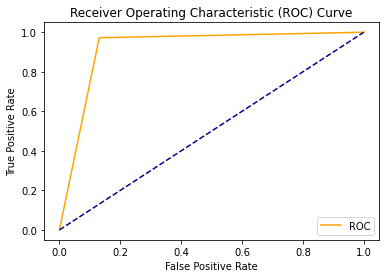

In [21]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
plot_roc_curve(fpr, tpr)

In [20]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [19]:
# Saving the trained model
pkl.dump(model, open("../Models/catboost.pkl", "wb"))
print("Model saved successfully")

Model saved successfully
